# EECS 731 Climate Changes

**Author: Likitha Vemulapalli<br>
Date: 11-23-2020 <br>
M.S in Computer Science <br>
University of Kansas**

# Exploratory Data Analysis for United Kingdom

#Importing required libraries

In [1]:
import numpy as np
import pandas as pd

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from  datetime import datetime as dt

# Importing Data

In [2]:
df_temp = pd.read_csv ('UK_data.csv')

In [3]:
df_temp.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,uk,01/01/1973,44.6,30.3,40.4,30.9,NaN,0.00,NaN,11.3,NaN,1.6,65.2,87.83,Partially cloudy
1,uk,01/02/1973,46.5,31.3,41.8,33.1,NaN,0.01,NaN,11.4,NaN,2.0,51.7,87.27,"Rain, Partially cloudy"
2,uk,01/03/1973,53.6,46.4,49.6,41.2,NaN,0.00,NaN,11.4,NaN,5.4,90.5,84.87,Overcast
3,uk,01/04/1973,51.9,45.7,50.4,47.4,NaN,0.00,0.0,5.6,NaN,1.3,97.5,90.75,Overcast
4,uk,01/05/1973,48.3,39.3,43.7,33.3,NaN,0.00,NaN,14.9,NaN,3.9,77.8,81.33,Overcast


# Feature Engineering

In [4]:
# Extract year from each reading
df_temp ['Year'] = pd.DatetimeIndex (df_temp ['Date time']).year
df_temp ['Month'] = pd.DatetimeIndex (df_temp ['Date time']).month
df_temp.tail ()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Year,Month
17467,uk,10/30/2020,61.4,58.4,59.6,NaN,NaN,0.02,NaN,12.4,33.3,11.8,0.4,85.50,Rain,2020,10
17468,uk,10/31/2020,60.0,51.9,56.3,NaN,NaN,0.30,NaN,17.7,38.0,12.8,2.2,81.39,Rain,2020,10
17469,uk,11/01/2020,63.6,51.7,59.3,NaN,NaN,0.00,NaN,20.3,35.3,6.0,89.4,81.07,Overcast,2020,11
17470,uk,11/02/2020,63.6,46.7,57.2,42.5,NaN,0.00,NaN,26.6,43.8,6.1,73.5,69.64,Partially cloudy,2020,11
17471,uk,11/03/2020,51.4,43.0,47.3,38.1,NaN,0.00,NaN,21.0,26.4,6.1,66.4,74.40,Partially cloudy,2020,11


#Changes in Temperature for each season

In [5]:
#function for getting season based on month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    
min_year = df_temp['Year'].min()
max_year = df_temp['Year'].max()
years = range(min_year, max_year + 1)
    
df_temp['Season'] = df_temp['Month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    years_data = df_temp[df_temp['Year'] == year]
    spring_temps.append(years_data[years_data['Season'] == 'Spring']['Temperature'].mean())
    summer_temps.append(years_data[years_data['Season'] == 'Summer']['Temperature'].mean())
    autumn_temps.append(years_data[years_data['Season'] == 'Autumn']['Temperature'].mean())
    winter_temps.append(years_data[years_data['Season'] == 'Winter']['Temperature'].mean())

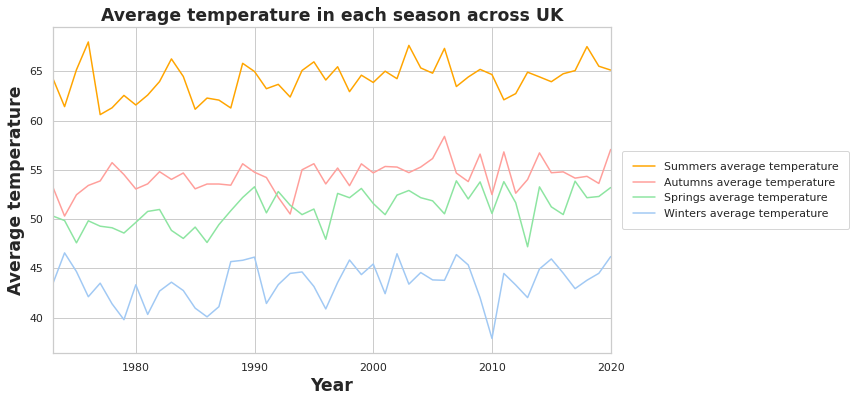

In [6]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature',fontsize = 'x-large', fontweight = 'bold')
ax.set_xlabel('Year',fontsize = 'x-large', fontweight = 'bold')
ax.set_title('Average temperature in each season across UK',fontsize = 'x-large', fontweight = 'bold')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

For all the four seasons, the average temperature is plotted from 1970 to 2020. From the plot we can see that there is raise and fall of temperature based on the season. From 2010, the temperature increased gradually.

In [7]:
df_aggTemp = df_temp.groupby ('Year')[['Temperature', 'Maximum Temperature', 'Minimum Temperature']].mean ()
df_aggTemp.head()

,Temperature,Maximum Temperature,Minimum Temperature
Year,,,
1973,52.890959,58.698904,46.841644
1974,52.076986,57.460274,46.805205
1975,52.520000,58.332329,46.962740
1976,53.371311,59.284973,47.671038
1977,51.858630,57.065205,46.969315


# Temperature plot 

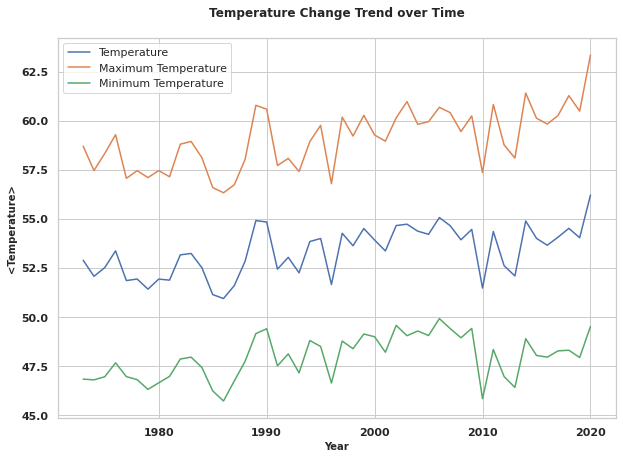

In [8]:
df_aggTemp.plot (figsize = (10, 7))
plt.xlabel ('Year', fontweight = 'bold', fontsize = 'small')
plt.ylabel ('<Temperature>', fontweight = 'bold', fontsize = 'small')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Temperature Change Trend over Time\n', fontweight = 'bold', fontsize = 'medium')
plt.grid ('on')
plt.show ()

#Focusing on the temperature and conditions in 2020 to get a clear view on the changes.

In [9]:
df_temppost2020 = df_temp[df_temp['Year'] > 2019]
df_temppost2020. tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Year,Month,Season
17467,uk,10/30/2020,61.4,58.4,59.6,NaN,NaN,0.02,NaN,12.4,33.3,11.8,0.4,85.50,Rain,2020,10,Autumn
17468,uk,10/31/2020,60.0,51.9,56.3,NaN,NaN,0.30,NaN,17.7,38.0,12.8,2.2,81.39,Rain,2020,10,Autumn
17469,uk,11/01/2020,63.6,51.7,59.3,NaN,NaN,0.00,NaN,20.3,35.3,6.0,89.4,81.07,Overcast,2020,11,Autumn
17470,uk,11/02/2020,63.6,46.7,57.2,42.5,NaN,0.00,NaN,26.6,43.8,6.1,73.5,69.64,Partially cloudy,2020,11,Autumn
17471,uk,11/03/2020,51.4,43.0,47.3,38.1,NaN,0.00,NaN,21.0,26.4,6.1,66.4,74.40,Partially cloudy,2020,11,Autumn


Text(0.5, 1.0, 'Conditions over Temperature\n')

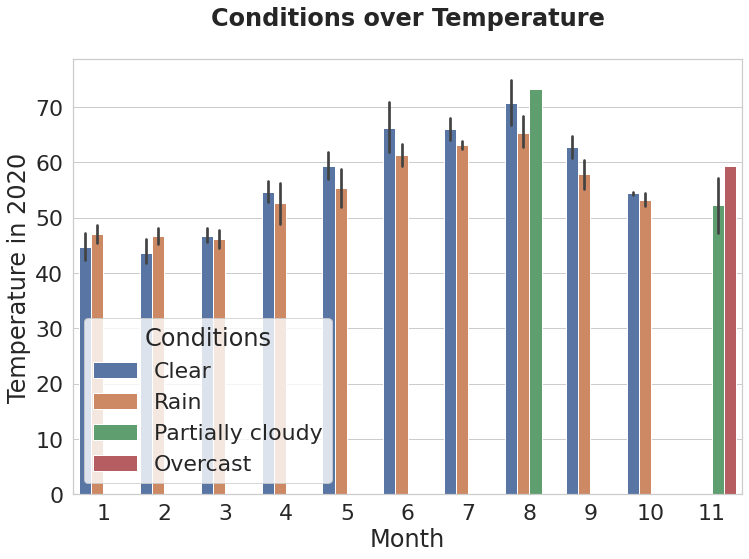

In [10]:
#Conditions in 2020
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Month", y="Temperature", hue="Conditions", data= df_temppost2020)
plt.xlabel("Month")
plt.ylabel("Temperature in 2020")
plt.title("Conditions over Temperature\n", fontweight = 'bold', fontsize = 'medium')

From this bar graph, we could clearly see the climate changes for the year 2020 during which month there is more rainfall and when it is overcast or partially cloudy.

# Changes in Precipitation during 2020

In [11]:
df_aggPrecipitation = df_temppost2020.groupby ('Month')[['Precipitation']].mean ()
print(df_aggPrecipitation)

       Precipitation
Month               
1           0.071613
2           0.137241
3           0.054516
4           0.047000
5           0.002258
6           0.094333
7           0.063226
8           0.156774
9           0.033667
10          0.214516
11          0.000000


Precipitation plot

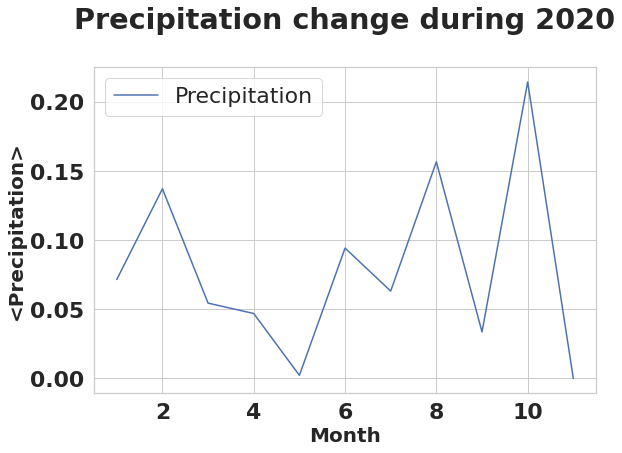

In [12]:
df_aggPrecipitation.plot (figsize = (9, 6))
plt.xlabel ('Month', fontweight = 'bold', fontsize = 'small')
plt.ylabel ('<Precipitation>', fontweight = 'bold', fontsize = 'small')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Precipitation change during 2020\n', fontweight = 'bold', fontsize = 'large')
plt.grid ('on')
plt.show ()

From this line graph we could see that during the month of october, the precipitation has reached it's maximum and it went very low during the month of May.

In [13]:
df_temppost2020.isnull().sum()

Name                     0
Date time                0
Maximum Temperature      0
Minimum Temperature      0
Temperature              0
Wind Chill             152
Heat Index             289
Precipitation            0
Snow Depth             308
Wind Speed               0
Wind Gust              187
Visibility               0
Cloud Cover              0
Relative Humidity        0
Conditions               0
Year                     0
Month                    0
Season                   0
dtype: int64

In [14]:
#dropping the columns not required from temperature
df_temperature = df_temppost2020.drop(columns = ['Name', 'Date time', 'Year', 'Month', 'Snow Depth', 'Wind Gust', 'Heat Index', 'Wind Chill'])

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.835698,0.967141,-0.134474,-0.250966,0.509444,-0.018805,-0.506383
Minimum Temperature,0.835698,1.000000,0.938428,0.072077,-0.140672,0.545344,0.015414,-0.183725
Temperature,0.967141,0.938428,1.000000,-0.045990,-0.213922,0.546538,0.010979,-0.386016
Precipitation,-0.134474,0.072077,-0.045990,1.000000,0.109482,-0.127286,-0.045145,0.464535
Wind Speed,-0.250966,-0.140672,-0.213922,0.109482,1.000000,-0.168182,0.135181,0.047992
Visibility,0.509444,0.545344,0.546538,-0.127286,-0.168182,1.000000,-0.141611,-0.267451
Cloud Cover,-0.018805,0.015414,0.010979,-0.045145,0.135181,-0.141611,1.000000,0.069313
Relative Humidity,-0.506383,-0.183725,-0.386016,0.464535,0.047992,-0.267451,0.069313,1.000000


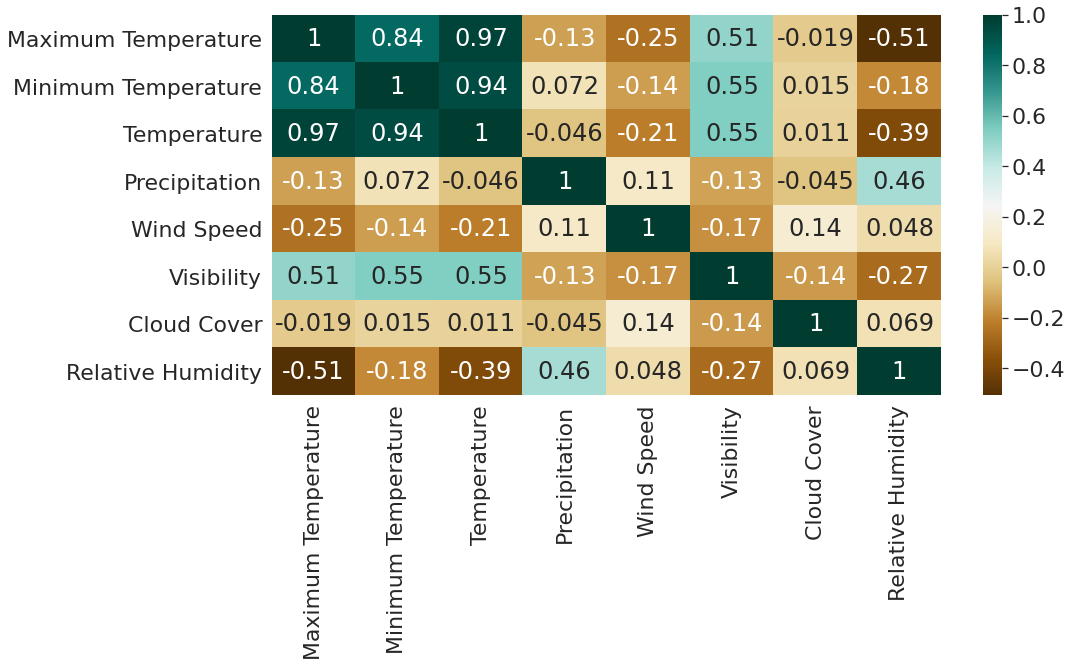

In [15]:
# Finding the relations between the variables.
plt.figure(figsize=(15,7))
c=df_temperature.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c

From this correlation matrix, we could see that there is a negative correlation between temperature and realtive humidity, strong relation between the temperatures, and precipitation has not much impact on the temperatures.